#Recolección de datos de Telegram


### Instalo librería de Telegram

[Telegram Tracker](https://github.com/estebanpdl/telegram-tracker): Este paquete se conecta con la API de telegram para generar archivos JSON con data de canales, incluyendo inmformacion y posts.

In [4]:
!git clone https://github.com/estebanpdl/telegram-tracker.git

fatal: destination path 'telegram-tracker' already exists and is not an empty directory.


In [5]:
%cd telegram-tracker

# install requirements
!pip install -r requirements.txt

# return to default's colab folder
%cd /content/

/content/telegram-tracker
/content


In [6]:
import json
import pandas as pd

# import from modules
from urllib.parse import urlparse

# plotting
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# seaborn
import seaborn as sns

### `Pasos`

- Crear dos directorios:
    - telegram
    - osintgpt
        - agrego `.env` file
- Agrego las API Keys de telegram en el archivo `config.ini` en telegram-tracker

### Recoleccion de datos de Telegram

JSON files por canal:


*   Channel metadata
*   Channel messages




In [10]:
#Me muevo al directorio telegram tracker
%cd /content/telegram-tracker/

# Defineo el canal de Telegram
TELEGRAM_CHANNEL_NAME = 'PLANDEMIA_MUNDIAL_COVID'

!python main.py --telegram-channel {TELEGRAM_CHANNEL_NAME} --output /content/telegram/

# return to default's colab folder
%cd /content/

/content/telegram-tracker

Init program at Wed Oct 25 15:17:23 2023


> Not Authorized! Sending code request...
Enter the code: 59832

> Collecting data from Telegram Channel -> PLANDEMIA_MUNDIAL_COVID
> ...

> Writing channel data...
> done.


59832
> Writing posts data...
> done.


End program at Wed Oct 25 15:21:06 2023


/content


In [11]:
# Define Telegram channel
with open(f'/content/telegram/{TELEGRAM_CHANNEL_NAME}/{TELEGRAM_CHANNEL_NAME}_messages.json') as f:
    data = json.load(f)
    f.close()

In [14]:
data.keys()

dict_keys(['_', 'pts', 'count', 'messages', 'topics', 'chats', 'users', 'inexact', 'offset_id_offset'])

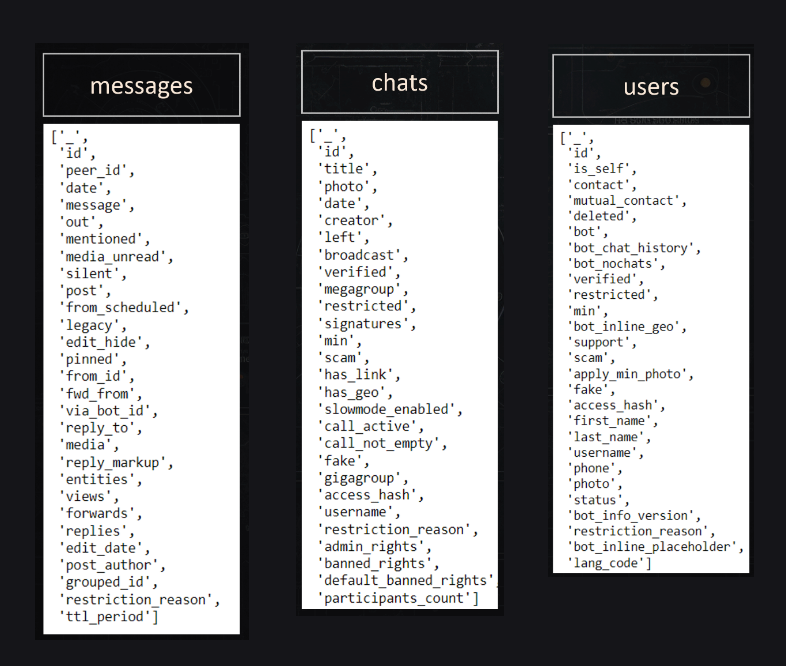

### Armo dataset a partir del canal

In [15]:
df = pd.DataFrame.from_dict(data['messages'])
df.shape

(17900, 32)

In [16]:
df.head()

,_,id,peer_id,date,message,out,mentioned,media_unread,silent,post,...,views,forwards,replies,edit_date,post_author,grouped_id,reactions,restriction_reason,ttl_period,action
0,Message,18535,"{'_': 'PeerChannel', 'channel_id': 1426315759}",2023-10-25 11:29:19+00:00,,False,False,False,False,True,...,3724.0,67.0,None,2023-10-25 11:29:22+00:00,NaN,1.358587e+16,None,[],None,NaN
1,Message,18534,"{'_': 'PeerChannel', 'channel_id': 1426315759}",2023-10-25 11:29:19+00:00,,False,False,False,False,True,...,3659.0,67.0,None,2023-10-25 11:29:22+00:00,NaN,1.358587e+16,None,[],None,NaN
2,Message,18533,"{'_': 'PeerChannel', 'channel_id': 1426315759}",2023-10-25 11:29:19+00:00,Argentina\n\nMás evidencias de las recientws e...,False,False,False,False,True,...,3683.0,70.0,"{'_': 'MessageReplies', 'replies': 30, 'replie...",2023-10-25 11:37:46+00:00,NaN,1.358587e+16,"{'_': 'MessageReactions', 'results': [{'_': 'R...",[],None,NaN
3,Message,18532,"{'_': 'PeerChannel', 'channel_id': 1426315759}",2023-10-25 11:24:26+00:00,Argentina 2/2\n\n5. Se describe que el uso de ...,False,False,False,False,True,...,3343.0,50.0,"{'_': 'MessageReplies', 'replies': 5, 'replies...",2023-10-25 11:52:04+00:00,NaN,NaN,"{'_': 'MessageReactions', 'results': [{'_': 'R...",[],None,NaN
4,Message,18531,"{'_': 'PeerChannel', 'channel_id': 1426315759}",2023-10-25 11:21:15+00:00,Argentina. 1/2\n\nPROYECTO LEGISLATIVO DE LEY ...,False,False,False,False,True,...,3141.0,52.0,"{'_': 'MessageReplies', 'replies': 0, 'replies...",2023-10-25 11:26:18+00:00,NaN,NaN,"{'_': 'MessageReactions', 'results': [{'_': 'R...",[],None,NaN


In [20]:
users = pd.DataFrame.from_dict(data['users'])
users.shape

(14338, 33)

In [21]:
users.head()

,_,id,is_self,contact,mutual_contact,deleted,bot,bot_chat_history,bot_nochats,verified,...,username,phone,photo,status,bot_info_version,restriction_reason,bot_inline_placeholder,lang_code,emoji_status,usernames
0,User,136817688,False,False,False,False,True,False,False,False,...,Channel_Bot,None,"{'_': 'UserProfilePhoto', 'photo_id': 58762749...",None,4.0,[],None,None,None,[]
1,User,6335810971,False,False,False,False,False,False,False,False,...,None,None,"{'_': 'UserProfilePhoto', 'photo_id': 50150985...",{'_': 'UserStatusRecently'},NaN,[],None,None,None,[]
2,User,1232571238,False,False,False,False,False,False,False,False,...,None,None,"{'_': 'UserProfilePhoto', 'photo_id': 51500863...",{'_': 'UserStatusRecently'},NaN,[],None,None,None,[]
3,User,5678608425,False,False,False,False,False,False,False,False,...,None,None,None,{'_': 'UserStatusRecently'},NaN,[],None,None,None,[]
4,User,5484084917,False,False,False,False,False,False,False,False,...,None,None,None,{'_': 'UserStatusRecently'},NaN,[],None,None,None,[]


In [23]:
chats = pd.DataFrame.from_dict(data['chats'])
chats.shape

(30, 34)

In [24]:
chats.head()

,_,id,title,photo,date,creator,left,broadcast,verified,megagroup,...,forum,access_hash,username,restriction_reason,admin_rights,banned_rights,default_banned_rights,participants_count,usernames,until_date
0,Channel,1426315759,PLANDEMIA MUNDIAL COVID 2021 🧡,"{'_': 'ChatPhoto', 'photo_id': 509171278102302...",2023-10-25 15:03:26+00:00,False,False,True,False,False,...,False,-502644747757669018,PLANDEMIA_MUNDIAL_COVID,[],NaN,NaN,None,NaN,[],NaN
1,Channel,1321647218,Adventista Hoy,"{'_': 'ChatPhoto', 'photo_id': 589099008009133...",2021-02-25 06:11:31+00:00,False,False,True,False,False,...,False,-8361937760973556573,adventistahoy,[],NaN,NaN,None,NaN,[],NaN
2,ChannelForbidden,1654348946,Bully Anonymus,NaN,NaN,NaN,NaN,True,NaN,False,...,NaN,-8911230061692547953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Channel,1317143701,PLANDEMIA MUNDIAL COVID 2021,"{'_': 'ChatPhoto', 'photo_id': 509594303604678...",2021-01-31 23:53:08+00:00,False,False,False,False,True,...,False,6437375439261459780,PlandemiaMundialCovid2021,[],NaN,NaN,"{'_': 'ChatBannedRights', 'until_date': '2038-...",NaN,[],NaN
4,Channel,1111547079,NO LO VERÁS EN LA TV by Ovc25 🗞📰📲,"{'_': 'ChatPhoto', 'photo_id': 595621993025907...",2022-02-26 03:21:08+00:00,False,False,True,False,False,...,False,1693002502296714423,apagalatvya,[],NaN,NaN,None,NaN,[],NaN


### Preparación de los Datos

Comprender los matices temporales de los datos es clave, especialmente cuando se trabaja con plataformas dinámicas como Telegram. La función timestamp_attrs:

* Procesa fechas: convierte la columna de fecha a un formato de fecha y
hora adecuado y la ajusta a la zona horaria determinada.
Extrae atributos: la función luego recopila atributos de marca de tiempo:
* Marca de tiempo estándar: una marca de tiempo completa que incluye la fecha y la hora.
* Cadena de fecha: solo la fecha en formato 'AAAA-MM-DD'.
* Nombres de mes y día: nombres textuales para el mes y el día.
Componentes de tiempo: esto incluye el tiempo completo, así como horas, minutos y segundos individuales.

In [17]:
def timestamp_attrs(d, timezone, col='date'):
    '''
    '''
    # process dates
    t = pd.to_datetime(
        d[col],
        infer_datetime_format=True,
        yearfirst=True
    ).apply(lambda x: x.tz_convert(timezone))

    # timestamp sttributes
    d[f'{col}_timestamp'] = t.dt.strftime('%Y-%m-%d %H:%M:%S')
    d[f'{col}_string'] = t.dt.strftime('%Y-%m-%d')
    d[f'{col}_month_name'] = t.dt.month_name()
    d[f'{col}_day_name'] = t.dt.day_name()
    d[f'{col}_time_hour'] = t.dt.strftime('%H:%M:%S')
    d[f'{col}_hour'] = t.dt.hour
    d[f'{col}_minute'] = t.dt.minute
    d[f'{col}_second'] = t.dt.second

    return d

In [18]:
timezone = 'America/Buenos_Aires'

# Get date attributes
df = timestamp_attrs(df, timezone)
df.shape

(17900, 40)

In [19]:
df.head()

,_,id,peer_id,date,message,out,mentioned,media_unread,silent,post,...,ttl_period,action,date_timestamp,date_string,date_month_name,date_day_name,date_time_hour,date_hour,date_minute,date_second
0,Message,18535,"{'_': 'PeerChannel', 'channel_id': 1426315759}",2023-10-25 11:29:19+00:00,,False,False,False,False,True,...,None,NaN,2023-10-25 08:29:19,2023-10-25,October,Wednesday,08:29:19,8,29,19
1,Message,18534,"{'_': 'PeerChannel', 'channel_id': 1426315759}",2023-10-25 11:29:19+00:00,,False,False,False,False,True,...,None,NaN,2023-10-25 08:29:19,2023-10-25,October,Wednesday,08:29:19,8,29,19
2,Message,18533,"{'_': 'PeerChannel', 'channel_id': 1426315759}",2023-10-25 11:29:19+00:00,Argentina\n\nMás evidencias de las recientws e...,False,False,False,False,True,...,None,NaN,2023-10-25 08:29:19,2023-10-25,October,Wednesday,08:29:19,8,29,19
3,Message,18532,"{'_': 'PeerChannel', 'channel_id': 1426315759}",2023-10-25 11:24:26+00:00,Argentina 2/2\n\n5. Se describe que el uso de ...,False,False,False,False,True,...,None,NaN,2023-10-25 08:24:26,2023-10-25,October,Wednesday,08:24:26,8,24,26
4,Message,18531,"{'_': 'PeerChannel', 'channel_id': 1426315759}",2023-10-25 11:21:15+00:00,Argentina. 1/2\n\nPROYECTO LEGISLATIVO DE LEY ...,False,False,False,False,True,...,None,NaN,2023-10-25 08:21:15,2023-10-25,October,Wednesday,08:21:15,8,21,15


In [25]:
# Ordeno valores por tiempo
df = df.sort_values(by='date_timestamp').copy()

# start date
print (df['date_timestamp'].iloc[0])

# end date
print (df['date_timestamp'].iloc[-1])

2020-11-28 11:05:36
2023-10-25 08:29:19


In [26]:
#Comparo la fecha de creacion del canal con el primer mensaje
obj = [i for i in data['chats'] if 'username' in i.keys() and i['username'] == TELEGRAM_CHANNEL_NAME]

# channel creation date
print (obj[0]['date'])

2023-10-25 15:03:26+00:00


Comenzamos ordenando el marco de datos según la columna 'date_timestamp' para asegurarnos de que nuestros datos estén en orden cronológico. A continuación, agrupamos los datos ordenados por 'cadena_fecha' (que representa cada día único) y agregamos la suma de los valores del 'contador' para cada grupo. Básicamente, esto nos da el recuento de mensajes para cada día único.

In [27]:
df['counter'] = 1

In [28]:
t_data = df.sort_values(by='date_timestamp').groupby('date_string').agg(
    {
        'counter': 'sum'
    }
)

# Index Conversion. This ensures that the date strings are recognized as actual datetime objects.
t_data.index = pd.DatetimeIndex(t_data.index)

# Data sample size
t_data.shape

(1011, 1)

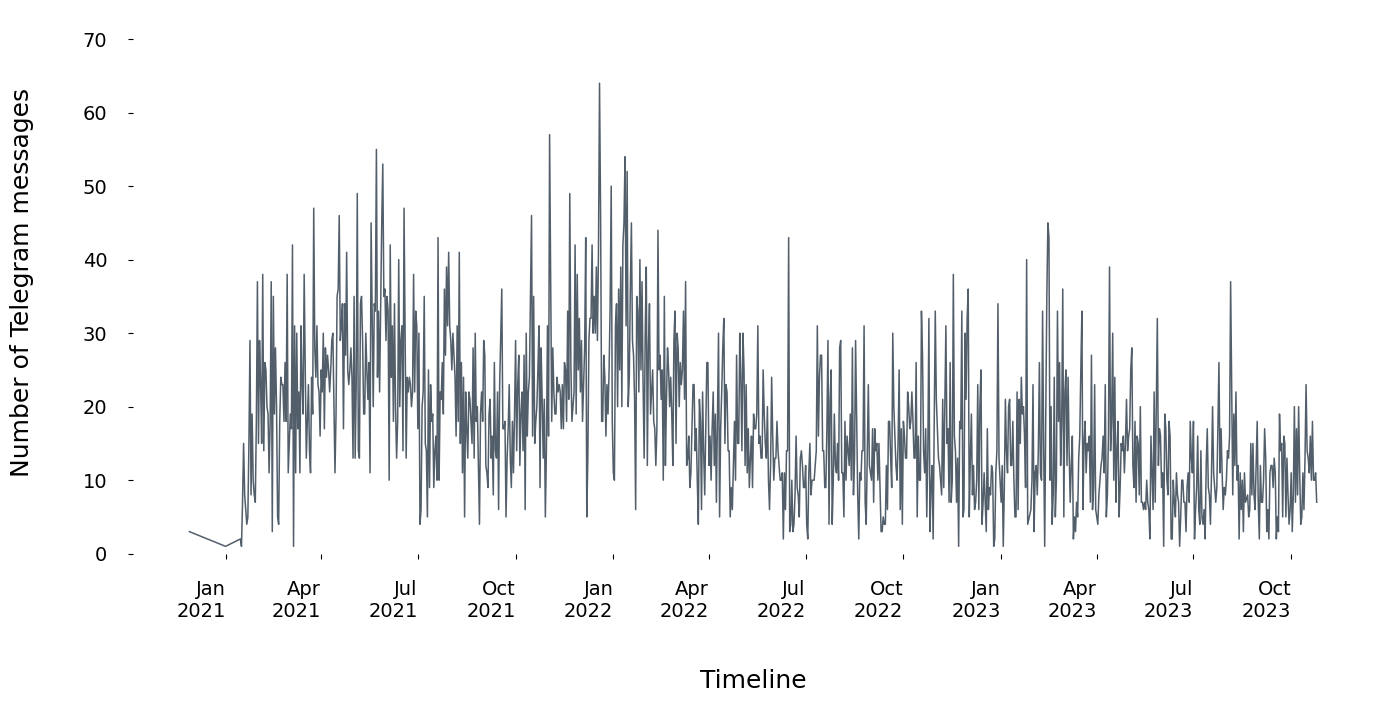

In [29]:
# plot
dev_color = '#000000'
fig, ax = plt.subplots(figsize=(16,8))
t_data.plot(y='counter', kind='line', linewidth=1.1, ax=ax, alpha=0.8, color='#273746',
            legend=False, ylim=(0, t_data['counter'].max() + 10))

# set ticks every hour
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))

# set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

ax.tick_params(direction='out', color=dev_color, labelsize=14, rotation=0,
               pad=15, labelcolor=dev_color)

# labels
ax.set_ylabel('Number of Telegram messages', labelpad=35, fontsize=18, color=dev_color)
ax.set_xlabel('Timeline', labelpad=35, fontsize=18, color=dev_color)

plt.box(False);


### Procesamiento y agregado de features

Manejo de datos nulos
* fillna(0) remplazo los NaN (Not a Number) con ceros. NaN values suelen indicar data faltante.
* astype(int) convierte los valores de la columna en enteros.

In [1]:
engagements_cols = ['views', 'forwards', 'replies']
for c in engagements_cols:
    df[c] = df[c].fillna(0).astype(int)

NameError: ignored